MINI PROJECT
EDA(Exploratory Data Analysis)
LOAD-->Clean-->Visual-->interpret
Advanced EDA pipline
*bring the data along python using pandas
*handling the wrong data types
*Maths foundation 
EDA is bridge of raw data and Ml model

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.shape

(891, 15)

In [27]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median(),inplace = True)
titanic.dropna(subset=['embarked'], inplace = True)


C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6516\2916591924.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['age'] = titanic['age'].fillna(titanic['age'].median(),inplace = True)


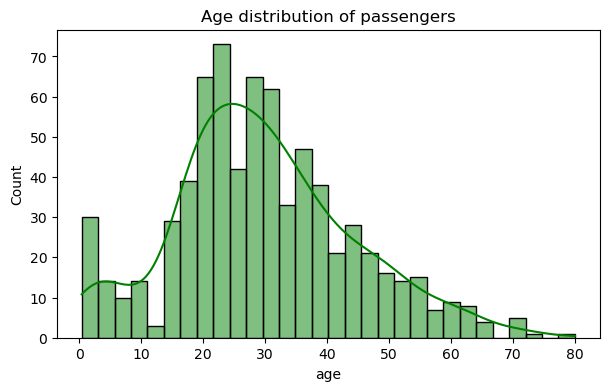

In [7]:
plt.figure(figsize = (7,4))
sns.histplot(titanic['age'], kde=True, bins=30, color = 'green')
plt.title("Age distribution of passengers")
plt.show()

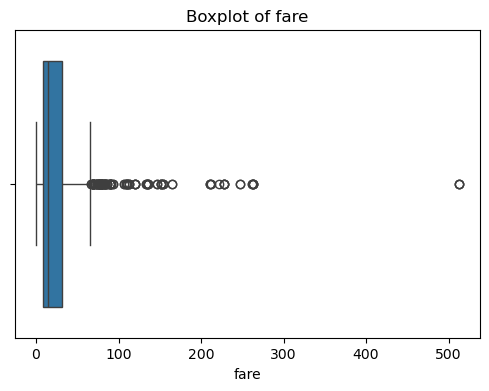

In [58]:
# detecting the outtliers 
plt.figure(figsize=(6,4))
sns.boxplot(x=titanic['fare'])
plt.title("Boxplot of fare")
plt.show()

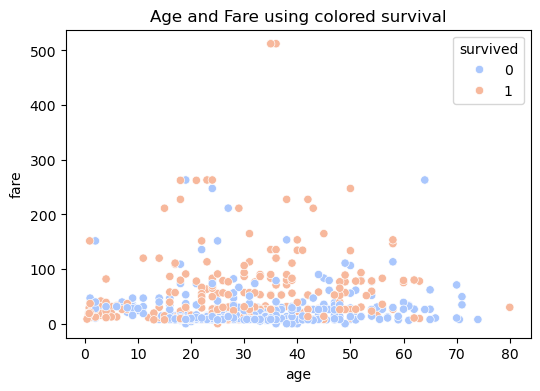

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
plt.figure(figsize = (6,4))
sns.scatterplot(x='age', y='fare', data=titanic, hue='survived', palette='coolwarm')
plt.title("Age and Fare using colored survival")
plt.show()

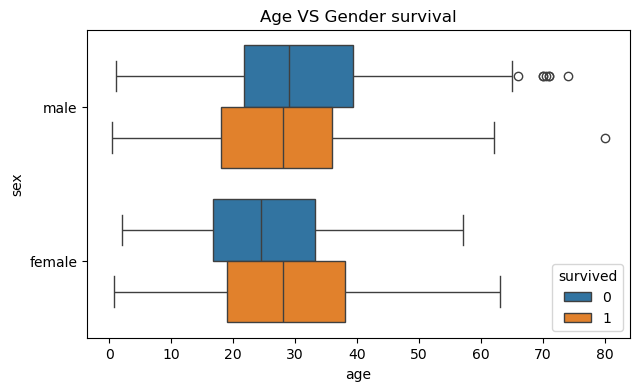

In [5]:
plt.figure(figsize = (7,4))
sns.boxplot(x='age',y='sex',data=titanic,hue='survived')
plt.title("Age VS Gender survival")
plt.show()

In [11]:
#groupby and visualization
survival_rate = titanic.groupby('pclass')['survived'].mean()
print(survival_rate)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21864\336429575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= survival_rate.index, y=survival_rate.values, palette='viridis')


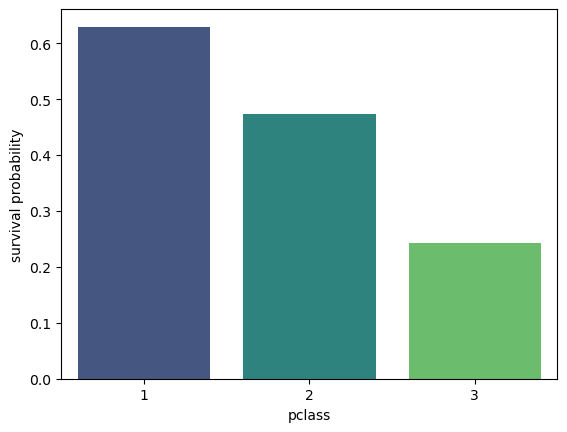

In [15]:
sns.barplot(x= survival_rate.index, y=survival_rate.values, palette='viridis')
plt.ylabel("survival probability")
plt.show()

In [18]:
prob_by_gender = titanic.groupby('sex')['survived'].mean()
print(prob_by_gender)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


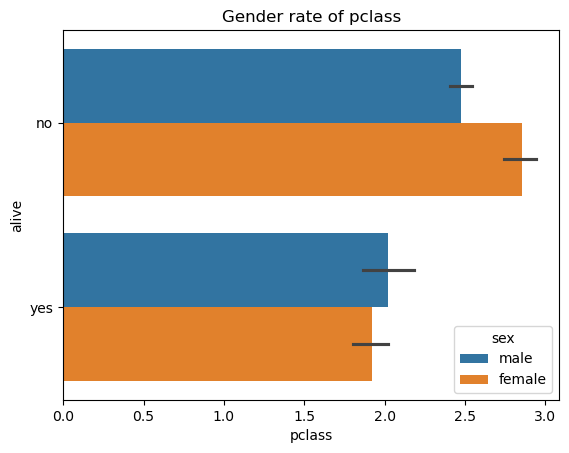

In [22]:
sns.barplot(x='pclass',y='alive',data=titanic,hue='sex')
plt.title("Gender rate of pclass")
plt.show()


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [12]:
tips.shape

(244, 7)

In [15]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
tips['day'] = tips['day'].fillna(tips['day'].mode(),inplace = True)
tips.dropna(subset=['size'], inplace = True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_20116\1742119383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tips['day'] = tips['day'].fillna(tips['day'].mode(),inplace = True)


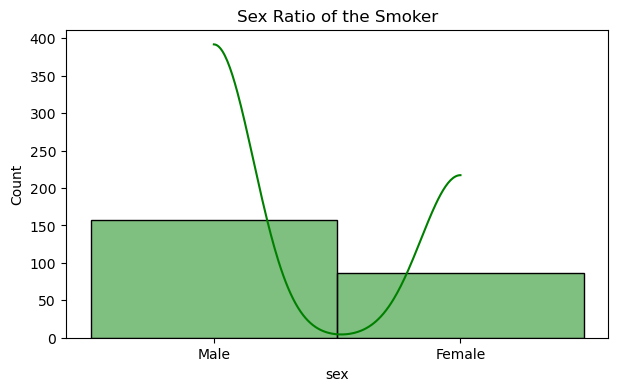

In [19]:
plt.figure(figsize = (7,4))
sns.histplot(tips['sex'],kde=True,bins=20,color='green')
plt.title("Sex Ratio of the Smoker")
plt.show()

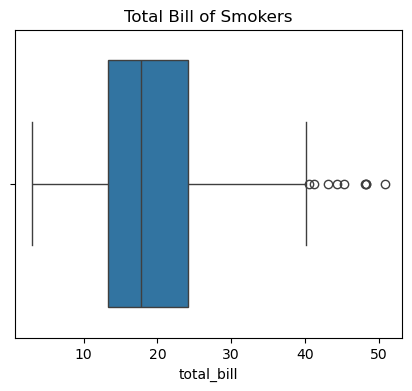

In [25]:
plt.figure(figsize = (5,4))
sns.boxplot(x=tips['total_bill'])
plt.title("Total Bill of Smokers")
plt.show()

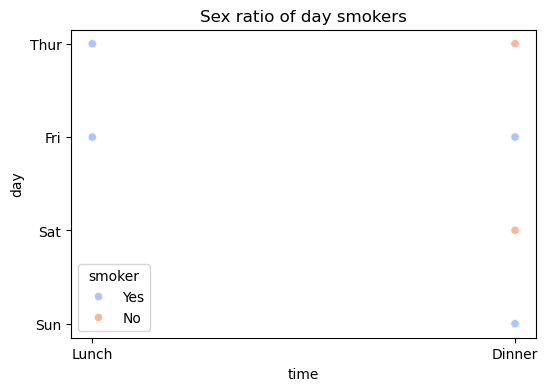

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset("tips")
plt.figure(figsize = (6,4))
sns.scatterplot(x='time',y='day',data=tips,hue='smoker',palette='coolwarm')
plt.title("Sex ratio of day smokers")
plt.show()

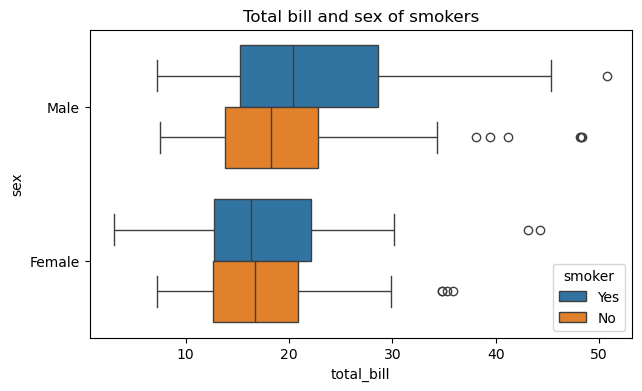

In [11]:
plt.figure(figsize = (7,4))
sns.boxplot(x='total_bill',y='sex',data=tips,hue='smoker')
plt.title("Total bill and sex of smokers")
plt.show()

In [16]:
smokers_rate = tips.groupby('time')['size'].mean()
print(smokers_rate)


time
Lunch     2.411765
Dinner    2.630682
Name: size, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10424\1147969035.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smokers_rate = tips.groupby('time')['size'].mean()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10424\2540893136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= smokers_rate.index, y=smokers_rate.values, palette='viridis')


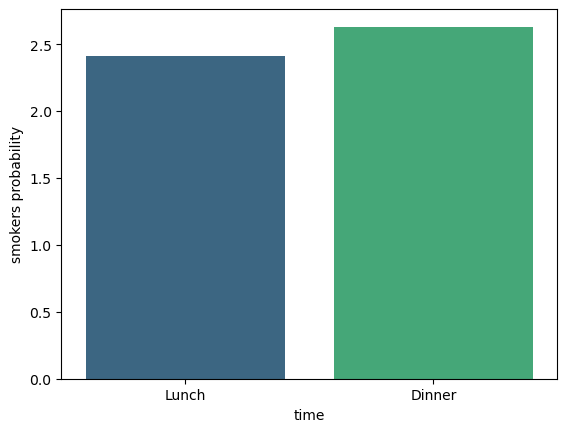

In [17]:
sns.barplot(x= smokers_rate.index, y=smokers_rate.values, palette='viridis')
plt.ylabel("smokers probability")
plt.show()

In [19]:
prob_by_gender = tips.groupby('sex')['size'].mean()
print(prob_by_gender)

sex
Male      2.630573
Female    2.459770
Name: size, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10424\1851417447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_by_gender = tips.groupby('sex')['size'].mean()


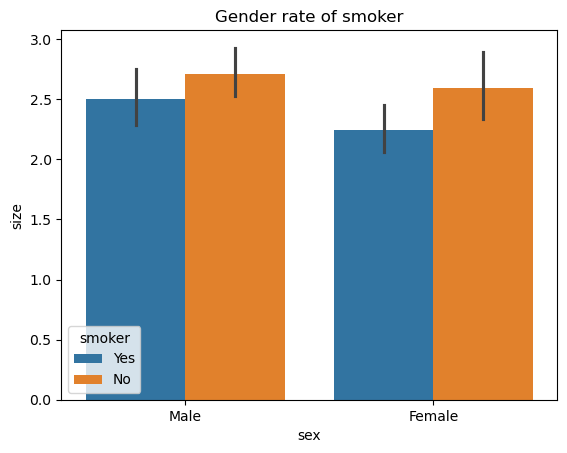

In [21]:
sns.barplot(x='sex',y='size',data=tips,hue='smoker')
plt.title("Gender rate of smoker")
plt.show()